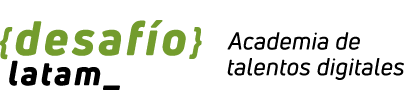

<center><h1>  <font color='green'> Manipulación y transformación de datos I</font></h1></center>
<hr>

La manipulación de DataFrames es una habilidad importante en el análisis de datos, ya que estos rara vez están en la forma adecuada para su análisis por lo que  deben ser transformados para trabajar e interpretarlos.

 # <font color='green'>Manipulación de DataFrames</font>


 ## <font color='green'>Combinar y unir datos</font>


- En **SQL**, conocemos las maneras de unir tablas mediante el cruce de una o más columnas usando JOINS.Los tipos más utilizados son los siguientes:


- **INNER JOIN:** Este comando devuelve solo los registros que tienen coincidencias en ambas tablas.
- **LEFT JOIN:** Este comando devuelve todos los registros de la tabla de la izquierda y los registros coincidentes de la tabla de la derecha. **Si no hay coincidencias en la tabla de la derecha, los campos aparecerán como nulos.**
- **RIGHT JOIN:** Este comando devuelve todos los registros de la tabla de la derecha y los registros coincidentes de la tabla de la izquierda. **Si no hay coincidencias en la tabla de la izquierda, los campos aparecerán como nulos.**
- **FULL OUTER JOIN:** Este comando devuelve todos los registros de ambas tablas. Si hay coincidencias, se incluyen en el resultado. **Si no hay coincidencias, los campos aparecerán como nulos.**

<center>

<img src="https://estradawebgroup.com/ImagesUpload/sql-joins.jpg" width="500">

Fuente: https://estradawebgroup.com/ImagesUpload/sql-joins.jpg

</center>

En Pandas, se utiliza el método **merge** para hacer cruces con gran flexibilidad y rapidez. Para comenzar a utilizarlo definiremos dos DataFrames.

Primero, uno con rubros de productos y un identificador para cada uno:

In [ ]:
import pandas as pd
import numpy as np

# Lista de rubros
rubros = ["vestuario", "calzado", "hogar"]
n_rubros = len(rubros)

# Creamos un DataFrame de los rubros de venta
df_rubros = pd.DataFrame({'id_rubro': range(0, n_rubros), 'des_rubro': rubros})
df_rubros

,id_rubro,des_rubro
0,0,vestuario
1,1,calzado
2,2,hogar


Crearemos ahora otro DataFrame con 100 ventas. Cada una de ellas tendrá un identificador (id_venta), un número que alude al rubro de la venta, el precio del artículo vendido y la cantidad de artículos comprados.

In [ ]:
# Generaremos 100 ventas.
n_ventas = 100

df_ventas = pd.DataFrame(

    {  'id_venta': range(0, n_ventas)
     , 'rubro': np.random.randint(0, n_rubros, n_ventas)
     , 'precio': np.random.randint(2400, 10000, n_ventas)
     , 'cantidad': np.random.randint(1,  7, n_ventas)
    }
)

df_ventas

,id_venta,rubro,precio,cantidad
0,0,0,7476,1
1,1,2,4422,4
2,2,1,7904,5
3,3,1,3406,6
4,4,0,5848,5
...,...,...,...,...
95,95,1,5420,2
96,96,2,4515,2
97,97,0,5164,3
98,98,0,4370,6


Vamos a cruzar ambas tablas, considerando que en ambas se considera el rubro (con identificador) **aunque reciben nombres diferentes en cada tabla**. Por lo mismo, deberemos utilizar los parámetros

- **left_on:** columna(s) a cruzar por la izquierda.
- **right_on:** columnas(s) a cruzar por la derecha.

Además, habrá varias ventas por la izquierda a las que les corresponderá **un** elemento de la tabla por la derecha. Por lo mismo, utilizaremos la validación **many_to_one**

In [ ]:
df_merged = df_ventas.merge(df_rubros, left_on = 'rubro', right_on = 'id_rubro', validate = 'many_to_one')
df_merged

,id_venta,rubro,precio,cantidad,id_rubro,des_rubro
0,0,0,7476,1,0,vestuario
1,4,0,5848,5,0,vestuario
2,6,0,4362,4,0,vestuario
3,7,0,5288,4,0,vestuario
4,11,0,5499,3,0,vestuario
...,...,...,...,...,...,...
95,78,1,9406,6,1,calzado
96,84,1,4421,3,1,calzado
97,89,1,6560,4,1,calzado
98,90,1,4346,5,1,calzado


La validacion **"many_to_one"** indica que se debe verificar que la tabla de la derecha no tenga duplicados en la columna que se esta usando para el cruce. La tabla de la izquierda puede tener esas columnas con duplicados, no se realiza validación.

 ### <font color='green'>Parámetros del método merge</font>

El método **merge** tiene varios parámetros que se pueden utilizar para controlar cómo se realiza la combinación. Los parámetros más importantes son:

- **on:** este parámetro indica la columna o columnas que se van a utilizar para hacer la combinación. Es similar al JOIN en SQL, donde se especifica la columna en la que se van a comparar las filas de las tablas que se quieren unir, **en caso de que tengan el mismo nombre**. Así, por ejemplo, si ambos DataFrame tienen una columna llamada "nombre", basta con que escribamos **pd.merge(df1, df2, on='nombre')**. Si las columnas no tienen el mismo nombre en ambos DataFrames, debemos precisar utilizando **left_on** y **right_on**

- **how:** este parámetro indica el tipo de combinación que se va a realizar. Los valores posibles son **inner, outer, left y right**, con el mismo sentido que vimos inicialmente. Podemos usarlo como **pd.merge(df1, df2, on='columna_comun', how='inner')**

- **left_index y right_index:** estos parámetros se utilizan cuando se quiere combinar los DataFrames por los índices en lugar de por las columnas. Por ejemplo, **pd.merge(df1, df2, left_index=True, right_index=True)**

Veremos esto mediante un **ejemplo:**

Imaginemos que somos parte del equipo de una tienda en línea llamada "Gadget World" y tenemos acceso a dos DataFrames importantes:

- **df_usuarios:** contiene información sobre los usuarios.
- **df_pedidos:** contiene información sobre los pedidos realizados.


In [ ]:
import pandas as pd
import numpy as np

# Creamos el DataFrame de usuarios
usuarios = {
    'id_usuario': [1, 2, 3, 4, 5],
    'nombre': ['Juan', 'María', 'Pedro', 'Ana', 'Luisa'],
    'edad': [25, 30, 45, 22, 28]
}
df_usuarios = pd.DataFrame(usuarios)
df_usuarios

,id_usuario,nombre,edad
0,1,Juan,25
1,2,María,30
2,3,Pedro,45
3,4,Ana,22
4,5,Luisa,28


In [ ]:
# Creamos el DataFrame de pedidos
pedidos = {
    'id_pedido': [1, 2, 3, 4, 5, 6, 7, 8],
    'id_usuario': [1, 2, 3, 3, 4, 4, 4, 5],
    'fecha': ['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-02', '2022-01-02', '2022-01-03', '2022-01-03', '2022-01-04'],
    'producto': ['A', 'B', 'A', 'B', 'A', 'A', 'B', 'A'],
    'cantidad': [10, 5, 12, 8, 5, 6, 6, 15],
    'precio': [100, 50, 120, 80, 150, 150, 100, 90]
}
df_pedidos = pd.DataFrame(pedidos)
df_pedidos

,id_pedido,id_usuario,fecha,producto,cantidad,precio
0,1,1,2022-01-01,A,10,100
1,2,2,2022-01-01,B,5,50
2,3,3,2022-01-02,A,12,120
3,4,3,2022-01-02,B,8,80
4,5,4,2022-01-02,A,5,150
5,6,4,2022-01-03,A,6,150
6,7,4,2022-01-03,B,6,100
7,8,5,2022-01-04,A,15,90


Nos han asignado la tarea de crear un informe detallado sobre los usuarios y sus pedidos, incluyendo aquellos que no han realizado ninguna compra aún y todos los pedidos, independiente de si tienen un usuario asociado o no.

Para resolver este requerimiento podemos utilizar **outer join** para incluir los registros de cada tabla que no tienen coincidencia en la otra tabla. Podemos hacer el cruce con la columna común que tienen ambos DataFrames llamada 'id_usuario', para unir las tablas.

In [ ]:
df_merged = df_pedidos.merge(df_usuarios, on='id_usuario', how='outer')
df_merged

,id_pedido,id_usuario,fecha,producto,cantidad,precio,nombre,edad
0,1,1,2022-01-01,A,10,100,Juan,25
1,2,2,2022-01-01,B,5,50,María,30
2,3,3,2022-01-02,A,12,120,Pedro,45
3,4,3,2022-01-02,B,8,80,Pedro,45
4,5,4,2022-01-02,A,5,150,Ana,22
5,6,4,2022-01-03,A,6,150,Ana,22
6,7,4,2022-01-03,B,6,100,Ana,22
7,8,5,2022-01-04,A,15,90,Luisa,28


Con este código, se crea un nuevo DataFrame df_merged que contiene toda la información de los usuarios y los pedidos, incluso si hay usuarios que no han pedido nada y pedidos sin usuario asociado.

En un contexto de negocio, el outer join se puede utilizar para asegurarse de que no se pierda información importante durante el proceso de análisis de datos. En este caso específico, si solo se hubiera realizado un inner join, se habrían excluido todos los pedidos que no tuvieran un usuario asociado, lo que también habría llevado a una subestimación de la cantidad total de ventas realizadas. Además, si se hubiera realizado solo un inner join, también se habrían excluido todos los usuarios que no habían realizado pedidos, lo que habría llevado a una subestimación de la cantidad total de usuarios.

 ### <font color='green'>Creación de columnas calculadas</font>

Crearemos ahora una columna calculada llamada **monto_venta**, que de manera obvia multiplicará el precio del artículo vendido por la cantidad de artículos comprados.

In [ ]:
df_merged['monto_venta'] = df_merged['cantidad'] * df_merged['precio']
df_merged

,id_pedido,id_usuario,fecha,producto,cantidad,precio,nombre,edad,monto_venta
0,1,1,2022-01-01,A,10,100,Juan,25,1000
1,2,2,2022-01-01,B,5,50,María,30,250
2,3,3,2022-01-02,A,12,120,Pedro,45,1440
3,4,3,2022-01-02,B,8,80,Pedro,45,640
4,5,4,2022-01-02,A,5,150,Ana,22,750
5,6,4,2022-01-03,A,6,150,Ana,22,900
6,7,4,2022-01-03,B,6,100,Ana,22,600
7,8,5,2022-01-04,A,15,90,Luisa,28,1350


 ## <font color='green'>Tablas pivote, trasposición y funciones lambda</font>

### <font color='green'>Tablas pivote</font>

Las tablas pivote resultan de aplicar calculos sobre las columnas y obtener el resultado de forma agrupada, es decir, segmentado por categorias. Una manera cómoda y flexible de generarlas es usando el método **pd.pivot_table()**. Al utilizarlo necesitaremos indicar las etiquetas de **filas y columnas** para la nueva vista a generar, indicando tambien una **función de agregación** para aplicar sobre ciertos **valores.**

In [ ]:
df_pivot_reporte1 = pd.pivot_table(
                                   data = df_merged # DataFrame.
                                 , index = "nombre" # Columna(s) del DataFrame original que queremos como indice de la tabla resultante.
                                 , values = "monto_venta" # valores a lo que le aplicaremos la aggfunc.
                                 , aggfunc= "sum" # función a aplicar a la columna de valores.
                                 , margins = True # Generar una fila/columna de totales.
)

df_pivot_reporte1

,monto_venta
nombre,
Ana,2250
Juan,1000
Luisa,1350
María,250
Pedro,2080
All,6930


Para transformar los indices de la tabla resultante en columnas normales, puedes usar el método **".reset_index()"**

In [ ]:
df_pivot_reporte1.reset_index()

,nombre,monto_venta
0,Ana,2250
1,Juan,1000
2,Luisa,1350
3,María,250
4,Pedro,2080
5,All,6930


### <font color='green'>Trasposición de DataFrames</font>

La transposición de DataFrames consiste en intercambiar rapidamente las filas por las columnas para transformar la orientación de los datos en el DataFrame y facilitar su visualización y análisis. En **Excel**, por ejemplo, puedes transponer una tabla con solo unos pocos clics utilizando la función **"Transponer"** en la pestaña **"Pegado especial".**

En Pandas, puedes transponer un DataFrame utilizando el método **".T"** o **"transpose()"**

In [ ]:
df_pivot_reporte1.T

nombre,Ana,Juan,Luisa,María,Pedro,All
monto_venta,2250,1000,1350,250,2080,6930


In [ ]:
df_pivot_reporte1.transpose()

nombre,Ana,Juan,Luisa,María,Pedro,All
monto_venta,2250,1000,1350,250,2080,6930


### <font color='green'>Funciones lambda</font>

Cabe destacar que las funciones de agregación que ofrece **pd.pivot_table** son solo algunas como sum, mean, std, etc. Pero también podemos generar nuestra propia función a aplicar a los valores usando funciones **lambda**, como se muestra a continuación. Recordaremos antes cuál era el DataFrame **df_merged**

In [ ]:
df_merged

,id_pedido,id_usuario,fecha,producto,cantidad,precio,nombre,edad,monto_venta
0,1,1,2022-01-01,A,10,100,Juan,25,1000
1,2,2,2022-01-01,B,5,50,María,30,250
2,3,3,2022-01-02,A,12,120,Pedro,45,1440
3,4,3,2022-01-02,B,8,80,Pedro,45,640
4,5,4,2022-01-02,A,5,150,Ana,22,750
5,6,4,2022-01-03,A,6,150,Ana,22,900
6,7,4,2022-01-03,B,6,100,Ana,22,600
7,8,5,2022-01-04,A,15,90,Luisa,28,1350


In [ ]:
df_pivot_reporte2 = pd.pivot_table(
                                   data = df_merged
                                 , index = "producto"
                                 , values = "monto_venta"
                                 , aggfunc= lambda x: x.max() - x.min()
                                 , margins = True
)

# Debemos renombrar la columna calculada a **"rango_venta"** para no confundirla con la originar **monto_venta**.
df_pivot_reporte2 = df_pivot_reporte2.rename(columns = {'monto_venta': 'rango_venta'})

df_pivot_reporte2

,rango_venta
producto,
A,690
B,390
All,1190


- En este caso, x representa a los valores de la columna indicada en **values**, por lo que podemos aplicarle **.max()** y **.min().**
- La funcion lambda, se ejecutará para cada producto, A o B
- El resultado queda organizado con los productos en el indice, ya que asi fue como lo indicamos.

Calculemos ahora el peso o porcentaje de participación de cada producto en las ventas totales.

In [ ]:
df_pivot_reporte3 = pd.pivot_table(
                                   data = df_merged
                                 , index=  "producto"
                                 , values = "monto_venta"
                                 , aggfunc = lambda x: round((x.sum() / df_merged['monto_venta'].sum()) * 100, 2)
                                 , margins = True)

df_pivot_reporte3 = df_pivot_reporte3.rename(columns={'monto_venta': 'Porcentaje_ventas'})

df_pivot_reporte3

,Porcentaje_ventas
producto,
A,78.5
B,21.5
All,100.0


En este ejemplo, la función lambda se ve un poco diferente: debemos llamar al valor total de la columna **monto_venta** para usarla en el denominador y que sea fijo para cada cálculo.

# <font color='green'>Transformación y limpieza de datos</font>
## <font color='green'>Duplicados</font>

La eliminación de datos duplicados implica encontrar filas en una DataFrame que contengan exactamente los mismos valores en todas las columnas o en un subconjunto de columnas, y eliminar todas las filas duplicadas excepto una. Para hacer esto en Python, se puede utilizar la función **drop_duplicates()** de Pandas. Para mostrar su uso, consideremos el siguiente DataFrame

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'Nombre': ['Juan', 'Maria', 'Pedro', 'Juan', 'Maria'],
    'Edad': [25, 30, 35, 25, 28],
    'Ciudad': ['Madrid', 'Barcelona', 'Valencia', 'Madrid', 'Barcelona']
})

df

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Maria,30,Barcelona
2,Pedro,35,Valencia
3,Juan,25,Madrid
4,Maria,28,Barcelona


Obivamente, queremos eliminar todas las filas duplicadas basadas en las columnas **"Nombre" y "Ciudad"**.

In [ ]:
df_sin_duplicados = df.drop_duplicates(subset=['Nombre', 'Ciudad'])
df_sin_duplicados

,Nombre,Edad,Ciudad
0,Juan,25,Madrid
1,Maria,30,Barcelona
2,Pedro,35,Valencia


Podemos, además, encontrar aquellas filas duplicadas usando **".duplicated()**", que nos devolverá los valores duplicados que existen según los parámetros que introduzcamos

In [ ]:
df[df.duplicated()]

,Nombre,Edad,Ciudad
3,Juan,25,Madrid


In [ ]:
df[df.duplicated(subset = ["Nombre"])]

,Nombre,Edad,Ciudad
3,Juan,25,Madrid
4,Maria,28,Barcelona


In [ ]:
df.duplicated(subset = ["Nombre"])

0    False
1    False
2    False
3     True
4     True
dtype: bool

<center><b>¿Cómo podemos interpretar cada uno de los casos anteriores? ¿Qué realiza cada código?</b></center>

## <font color='green'>Datos faltantes</font>

Los datos faltantes o NaN (Not a Number) son valores que faltan o no están disponibles en un DataFrame. **NaN** es un **valor de punto flotante** que puede ser representado por la clase float en Python, pero también se puede acceder a él a través del módulo NumPy como **np.nan**.

In [ ]:
np.nan, type(np.nan)

(nan, float)

¿Por qué los valores NaN son de tipo float?  Esto se hace porque tiene implicaciones en cómo se manejan los datos faltantes en los cálculos. Por ejemplo, cuando se realiza una operación aritmética con NaN, el resultado siempre será NaN. Además, la comparación de valores NaN con cualquier otro valor, incluso con otro valor NaN, siempre devuelve False.

Algunas de las formas comunes de manejar los datos faltantes son:

- Obtener un DataFrame indicando True o False si cada celda tiene un valor NaN: **"isna()".**
- Eliminar filas o columnas con datos faltantes: esto se hace mediante el método **".dropna()"** que elimina todas las filas o columnas que contienen al menos un valor NaN.
- Reemplazar los valores faltantes con un valor específico: esto se puede hacer utilizando el método **".fillna()"** que reemplaza los valores NaN con un valor específico.

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame({
    'A': [1, 2, np.nan, 4],
    'B': [5, np.nan, np.nan, 8],
    'C': [9, 10, 11, 12]
})

df

,A,B,C
0,1.0,5.0,9
1,2.0,NaN,10
2,NaN,NaN,11
3,4.0,8.0,12


In [ ]:
df.isna()

,A,B,C
0,False,False,False
1,False,True,False
2,True,True,False
3,False,False,False


Podemos combinar las posibilidades para obtener diferentes resultados. Por ejemplo:

- obtener la cantidad de nulos en cada columna.

In [ ]:
df.isna().sum()

A    1
B    2
C    0
dtype: int64

- eliminar todas las filas que contienen al menos un valor NaN. El parámetro axis es 0 por defecto.

In [ ]:
df.dropna(axis = 0)

,A,B,C
0,1.0,5.0,9
3,4.0,8.0,12


- eliminar todas las columnas que contienen al menos un valor NaN.  El parametro axis es 0 por defecto.


In [ ]:
df.dropna(axis = 1)

,C
0,9
1,10
2,11
3,12


- reemplazar los valores NaN por uno que definamos usando el método **".fillna()"**

In [ ]:
df.fillna(0)

,A,B,C
0,1.0,5.0,9
1,2.0,0.0,10
2,0.0,0.0,11
3,4.0,8.0,12


- obtener los tipos de datos de las columnas originales del df.

In [ ]:
df.dtypes

A    float64
B    float64
C      int64
dtype: object

- Obtener los tipos de datos de las columnas luego de haber reemplazado los Nan con un string.

In [ ]:
df.fillna('p').dtypes

A    object
B    object
C     int64
dtype: object

💡 **Observa que:** si utilizamos un string para hacer el reemplazo, estaremos forzando a que algunas columnas fuercen su tipo de dato a ser de tipo string (object). Esto ocurre porque pandas exige que todos los valores de la columna sean numéricos para que la columna sea numérica.

Los valores nulos no impiden esto, ya que son de tipo float. Si ponemos aunque sea un elemento no numérico en la columnam esta automáticamente pasara a ser de tipo object. Las columnas de tipo object no implican que todos sus elementos sean de tipo string, pueden ser de cualquier tipo.

En definitiva, el tipo de dato object podemos interpretarlo como que la columna es de tipo string o de tipo mixto (tiene distintos tipos de datos).

# <font color='green'>El método apply (df.apply)</font>

El método apply es una función de pandas que se utiliza para aplicar una función especificada a través de un eje (fila o columna) de un DataFrame, utilizando una función lambda. Para mostrar su uso consideraremos el siguiente DataFrame:

In [ ]:
import pandas as pd
data = {
      'nombre': ['Alicia', 'Roberto', 'Claudia']
    , 'edad': [25, 30, 35]
    , 'puntaje': [50000, 60000, 70000]
}

df = pd.DataFrame(data)
df

,nombre,edad,puntaje
0,Alicia,25,50000
1,Roberto,30,60000
2,Claudia,35,70000


In [ ]:
df['puntaje'].apply(lambda x: x + 1)

0    50001
1    60001
2    70001
Name: puntaje, dtype: int64

Podemos también sumar 1 a cada valor de la columna puntaje **solo si el valor es mayor a 50000** ( y si no, dejarlo como estaba)

In [ ]:
df['puntaje'].apply(lambda x: x + 1 if x > 50000 else x)

0    50000
1    60001
2    70001
Name: puntaje, dtype: int64

### <font color='green'>Elmétodo map()</font>

Si deseamos transformar cada elemento de un DataFrame dependiendo de su tipo, podemos aplicar **map()** a cada columna del DataFrame. Si la columna contiene cadenas de texto, se pueden transformar a mayúsculas; si contiene números, se puede dividir por 1000.

Veremos un ejemplo

In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo
data = {
    'Nombre': ['Juan', 'María', 'Luis'],
    'Edad': [25000, 30000, 20000],
    'Ciudad': ['Madrid', 'Barcelona', 'Valencia']
}

df = pd.DataFrame(data)



Si queremos transformar a mayuscula si la celda es string, o dividir por 1000 si no lo es, podemos aplicar el siguiente código:

In [ ]:
# Aplicar transformaciones usando map() a cada columna
df['Nombre'] = df['Nombre'].map(lambda x: x.upper() if isinstance(x, str) else x)
df['Edad'] = df['Edad'].map(lambda x: x if isinstance(x, str) else x / 1000)
df['Ciudad'] = df['Ciudad'].map(lambda x: x.upper() if isinstance(x, str) else x)

print(df)

  Nombre  Edad     Ciudad
0   JUAN  25.0     MADRID
1  MARÍA  30.0  BARCELONA
2   LUIS  20.0   VALENCIA


### <font color='green'>Ejemplo 2</font>

Tenemos un diccionario cuyas claves son listas de textos, recogidos de redes sociales

In [ ]:
data = {
    'texto': [
        'Hoy es un gran día para empezar a aprender algo nuevo! #motivación',
        'Estoy muy emocionado por el partido de esta noche! #vamosequipo',
        'Qué triste noticia la pérdida de un gran artista como Chadwick Boseman #RIPChadwickBoseman',
        '¡Qué maravilloso día en el parque con la familia! #familia #naturaleza #airelibre',
        'No puedo creer lo que acabo de ver en las noticias. #indignación #justiciaparaMauricio',
        '¡Feliz cumpleaños a mi mejor amiga! #amistad #celebración #cumpleaños'
    ],
    'texto2': [
        'Hoy hace un día increíble en la playa! #playa #verano',
        'Acabo de ver la última película de mi actor favorito. ¡Qué actuación increíble! #cine #actuación',
        'Estoy emocionado por mi próximo viaje a Europa. ¡No puedo esperar para explorar nuevos lugares! #viaje #exploración',
        'Acabo de comenzar a leer un nuevo libro y ya estoy enganchado. #lectura #libros',
        '¡Feliz día de la independencia a todos! #díadelaindependencia #patriotismo #fiesta',
        'Aprendiendo a programar hoy. ¡Es difícil pero emocionante! #programación #desarrollo'
    ]
}

# Crear el DataFrame
df5 = pd.DataFrame(data)



Se nos pide encontrar todos los **hashtags** y mostrarlos de una forma organizada, que nos permita saber en cuál texto encontramos cada hashtag. Utilizaremos para ello el siguiente código:

In [ ]:
# Aplicar map() a cada columna para extraer los hashtags
df5['texto'] = df5['texto'].map(lambda x: [i for i in x.split() if "#" in i])
df5['texto2'] = df5['texto2'].map(lambda x: [i for i in x.split() if "#" in i])

# Mostrar el DataFrame con los hashtags
print(df5)

                                   texto  \
0                          [#motivación]   
1                         [#vamosequipo]   
2                  [#RIPChadwickBoseman]   
3    [#familia, #naturaleza, #airelibre]   
4  [#indignación, #justiciaparaMauricio]   
5  [#amistad, #celebración, #cumpleaños]   

                                           texto2  
0                               [#playa, #verano]  
1                             [#cine, #actuación]  
2                          [#viaje, #exploración]  
3                             [#lectura, #libros]  
4  [#díadelaindependencia, #patriotismo, #fiesta]  
5                    [#programación, #desarrollo]  


Este código aplica una función lambda a cada elemento del DataFrame utilizando el método **.map()**. Teniendo en cuenta que cada valor del DataFrame es un string (de hecho, una frase u oración), la función lambda toma cada valor del DataFrame y lo divide en palabras utilizando el método **split()**

Luego, para cada palabra una de estas palabras, la función verifica si contiene el carácter "#", que indica la presencia de un hashtag.

Si la palabra contiene el carácter "#", entonces se agrega a una lista de hashtags.

Finalmente, la función devuelve la lista de hashtags encontrados para cada valor del DataFrame.


# <font color='green'>Reemplazar datos</font>

Para mostrar los métodos asociados al remplazo de datos, comenzaremos considerando el siguiente DataFrame (**camiseta negro S** está intencionalmente repetido):

In [ ]:
import pandas as pd

data = {'producto':['camiseta negro S','camiseta rojo S','camiseta negro S','camiseta azul L','camiseta azul M','pantalón azul M','zapatos negro L','zapatos rojo L','zapatos azul L'],
        'precio': np.random.randint(1000, 5000, 9)}

df = pd.DataFrame(data)
df

,producto,precio
0,camiseta negro S,4135
1,camiseta rojo S,2038
2,camiseta negro S,4488
3,camiseta azul L,1084
4,camiseta azul M,3317
5,pantalón azul M,1558
6,zapatos negro L,4610
7,zapatos rojo L,2659
8,zapatos azul L,4480


**replace** nos permite:

- remplazar un elemento específico (aunque aparezca repetido)

In [ ]:
df.replace('camiseta negro S', 'camiseta - agotada')

,producto,precio
0,camiseta - agotada,4135
1,camiseta rojo S,2038
2,camiseta - agotada,4488
3,camiseta azul L,1084
4,camiseta azul M,3317
5,pantalón azul M,1558
6,zapatos negro L,4610
7,zapatos rojo L,2659
8,zapatos azul L,4480


- reemplazar utilizando un diccionario

In [ ]:
replace_dict = {'camiseta negro S': 'camiseta - agotada', 'pantalón azul M': 'pantalón - agotado'}
df_replaced = df.replace(replace_dict)
df_replaced

,producto,precio
0,camiseta - agotada,4135
1,camiseta rojo S,2038
2,camiseta - agotada,4488
3,camiseta azul L,1084
4,camiseta azul M,3317
5,pantalón - agotado,1558
6,zapatos negro L,4610
7,zapatos rojo L,2659
8,zapatos azul L,4480


- reemplazar utilizando expresiones regulares (regex), que son una herramienta poderosa para buscar y manipular cadenas de texto en Python y otros lenguajes de programación a partir de una secuencia de caracteres, que define un patrón de búsqueda.

Puedes encontrar más información al respecto consultando el **tutorial de reemplazo de datos**

In [ ]:
df_replaced.replace({'producto': r'agotad'}, {'producto': 'descontinuad'}, regex=True)

,producto,precio
0,camiseta - descontinuada,4135
1,camiseta rojo S,2038
2,camiseta - descontinuada,4488
3,camiseta azul L,1084
4,camiseta azul M,3317
5,pantalón - descontinuado,1558
6,zapatos negro L,4610
7,zapatos rojo L,2659
8,zapatos azul L,4480


De manera general, la sintaxias del método **replace** es **replace(to_replace,value,inplace,regex,limit)**, donde:

- **to_replace:** Es el valor que se quiere reemplazar. Puede ser un valor específico, una lista de valores o un diccionario que mapea valores originales a nuevos valores.

- **value:** Es el nuevo valor por el que se reemplazará to_replace. Puede ser un valor específico o un diccionario que mapea valores originales a nuevos valores.

- **inplace:** Es un parámetro booleano que indica si el reemplazo debe realizarse en el DataFrame original (inplace=True) o si se debe devolver un nuevo DataFrame con los valores reemplazados (inplace=False). El valor por defecto es False.

- **regex:** Es un parámetro booleano que indica si los valores a reemplazar se deben interpretar como expresiones regulares. Si se establece en True, se pueden utilizar patrones de expresiones regulares para encontrar y reemplazar valores en el DataFrame. Revisa información adicional en el tutorial de reemplazo de datos.

- **limit:** Es un parámetro que indica el número máximo de veces que se realizará el reemplazo en cada columna.


## <font color='green'>Ejercicio - A limpiar datos</font>

Considerando el archivo **calendar.csv**:

- elimina las filas que contengan nulos y reinicia el índice del DataFrame.
- Verifica si existen duplicados luego de eliminar los nulos.
- La columna price tiene caracteres como el signo "$",  además de puntos y comas, por lo que se lee como un string y no como un número. Límpiala para poder convertirla a tipo de dato float.

In [ ]:
# Intentemos resolver el ejercicio aquí






















In [ ]:
df = pd.read_csv("calendar.csv")
df

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
287792,8469464,2017-01-19,t,$59.00
287793,8469464,2017-01-18,t,$59.00
287794,8469464,2017-01-17,t,$59.00
287795,8469464,2017-01-16,t,$59.00


In [ ]:
#Limpiamos eliminando los nulos y reseteamos el indice.
df_sin_nulos = df.dropna().reset_index(drop=True)
df_sin_nulos

,listing_id,date,available,price
0,3075044,2017-08-22,t,$65.00
1,3075044,2017-08-21,t,$65.00
2,3075044,2017-08-20,t,$65.00
3,3075044,2017-08-19,t,$75.00
4,3075044,2017-08-18,t,$75.00
...,...,...,...,...
139347,8469464,2017-01-20,t,$59.00
139348,8469464,2017-01-19,t,$59.00
139349,8469464,2017-01-18,t,$59.00
139350,8469464,2017-01-17,t,$59.00


In [ ]:
# Observamos el tipo de dato de la columna price, es de tipo object.
df_sin_nulos.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [ ]:
# Con la función apply podemos quitar el signo dolar y comas para tambien convertir a float usando una sola instruccion lambda.
df_sin_nulos['price'].apply(lambda x: float(x.replace('$', '').replace(',', ''))).\
dtypes

dtype('float64')

Utilizando apply podemos usar lambda para iterar por los valores de la columna.

Existe otra forma, que es usando operacion vectorizada a traves del metodo **replace** con expresion regular. En este caso utilizamos expresion regular para referirnos a mas de un caracter a la vez.

Podemos Usar también **pd.to_numeric()** para convertir toda la columna a la vez y no valor por valor.

In [ ]:
# Removemos los signos "$" y las comas "," de la columna price.
pd.to_numeric(df_sin_nulos['price'].replace(r'[\$\,]', '', regex = True)).\
dtypes

dtype('float64')

Esta expresión regular buscará cualquier ocurrencia del signo de dólar o la coma en una cadena de texto. Por ejemplo, la cadena "$1,000" coincidiría con esta expresión regular porque contiene tanto el signo de dólar como la coma.

Además reemplazaremos esos caracteres con el string '', que tiene largo 0 (puedes encontrar más información sobre regex en el tutorial de reemplazo de datos)

In [ ]:
# Hacemos la conversion de tipo de dato formalmente y sobreescribimos la columna price con la resultante de la transformación.
df_sin_nulos['price'] = pd.to_numeric(df_sin_nulos['price'].replace(r'[\$\,]', '', regex = True))
df_sin_nulos.dtypes

listing_id      int64
date           object
available      object
price         float64
dtype: object

<center><b>¡Volvamos a la presentación!</b></center>